# Toward predicting the used car price
## Goal: predicting car price

##### Importing the relevant libraries

In [117]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Step 1: Getting the Data

In [118]:
data_df = pd.read_csv("Used Cars Price.csv")
data_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Step 2: Analyzing Data

In [119]:
data_df.shape

(4345, 9)

In [120]:
data_df.info()
### 'Price' and 'EngineV' have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


##### Exploring the descriptive statistics of the variables

In [121]:
# include='all' shows all numerical and string values

data_df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Step 3: Preprocessing (prepare data)

#### 3.1 splite dataset to train and test (test 20% data and train 80% data)

In [122]:
train_set, test_set = train_test_split(data_df, test_size=0.2, random_state= 42)
train_set.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
3666,Toyota,23700.0,sedan,100,2.50,Gas,yes,2014,Camry
2281,Renault,5800.0,vagon,200,1.46,Diesel,yes,2008,Grand Scenic
736,Audi,4800.0,sedan,390,2.60,Petrol,yes,1993,100
3416,Audi,1950.0,vagon,300,1.80,Petrol,no,1999,A4
3434,BMW,23500.0,crossover,74,2.00,Petrol,yes,2010,X1


In [123]:
data = train_set.copy()

#### 3.2 To predict the label, we should get correlation 'Label' column with other columns.

In [124]:
# Standard correlation coefficient [-1, 1]
# if correlation around 0, it's not important and dose't get any informations.
# in this case just get linear correlation

corr_matrix = data.corr(numeric_only=True)
corr_matrix['Price'].sort_values(ascending = False)

Price      1.000000
Year       0.489322
EngineV    0.061124
Mileage   -0.479207
Name: Price, dtype: float64

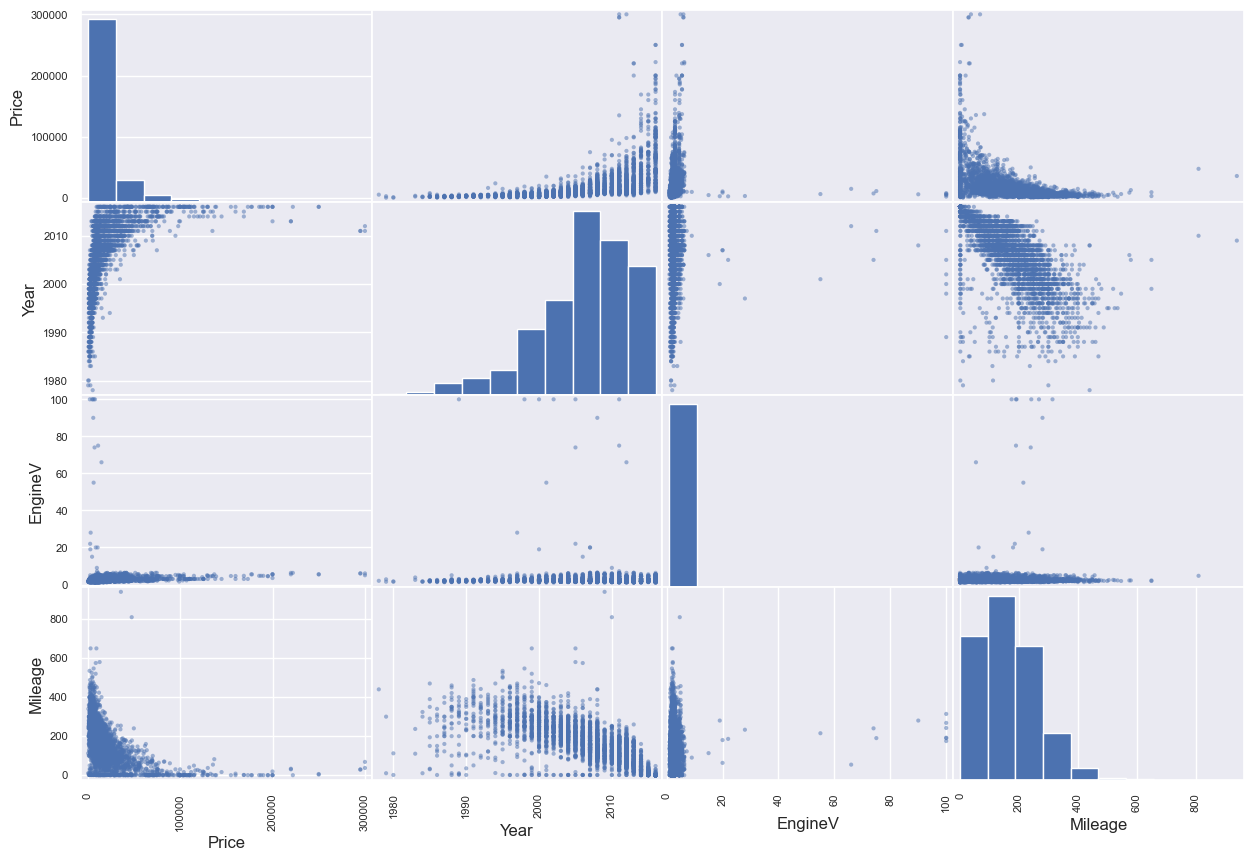

In [125]:
# the most correlation features
features = ['Price','Year','EngineV','Mileage']
scatter_matrix(data[features], figsize = (15,10))
plt.show()

#### 3.3 Dealing with outliers

##### Exploring the PDFs (Probability Density Function)

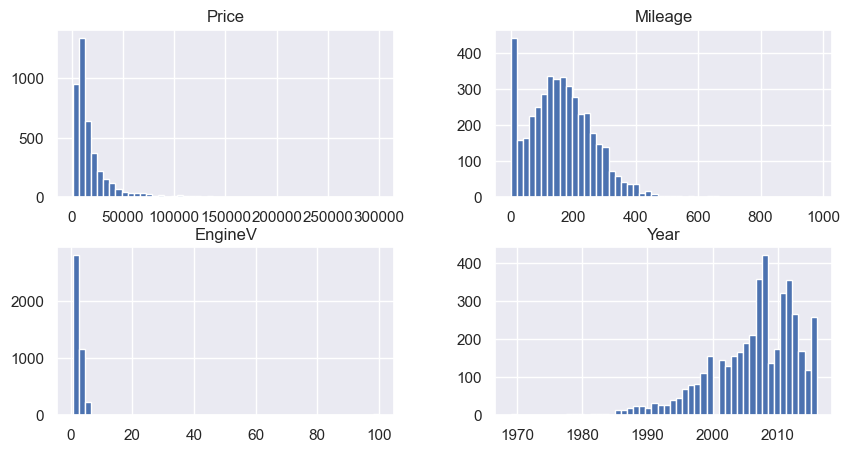

In [126]:
data_df.hist(bins=50, figsize = (10, 5))
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

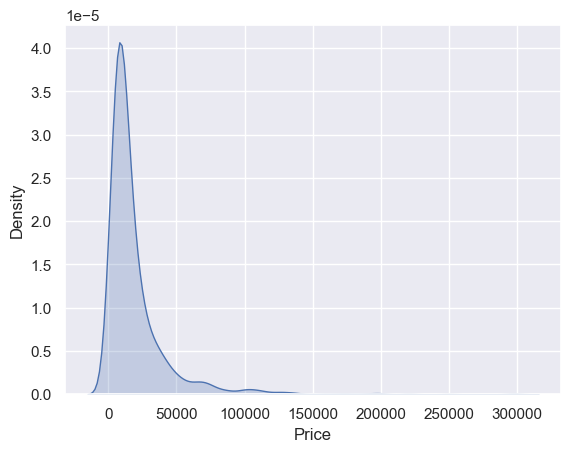

In [127]:
# 1. Price
sns.kdeplot(data['Price'], fill = True, legend = False)
### 20000$ is the most price

In [128]:
q = data['Price'].quantile(0.99)   # 99% top of data
data_1 = data[data['Price'] < q]
data_1.describe(include='all')

### ekhtelaf beyne max va mean kam shod.
### be tozie normal kami nazdik shod.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3302,3302.000000,3302,3302.000000,3182.000000,3302,3302,3302.000000,3302
unique,7,NaN,6,NaN,NaN,4,2,NaN,290
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,739,NaN,1293,NaN,NaN,1518,2992,NaN,147
mean,NaN,17890.342335,NaN,164.665051,2.742772,NaN,NaN,2006.305270,NaN
std,NaN,19199.686334,NaN,103.056799,4.924036,NaN,NaN,6.644253,NaN
min,NaN,600.000000,NaN,0.000000,1.000000,NaN,NaN,1978.000000,NaN
25%,NaN,6900.000000,NaN,92.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,11200.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


<Axes: xlabel='Price', ylabel='Density'>

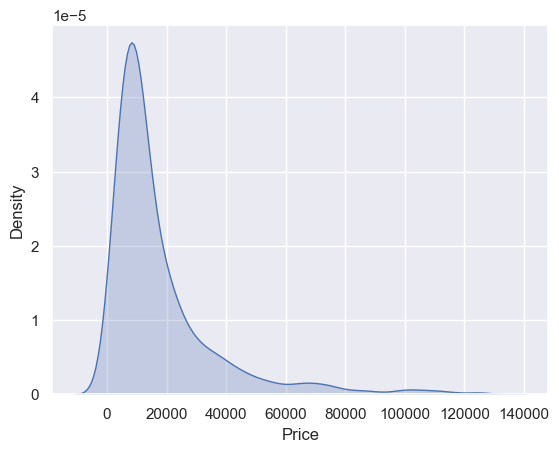

In [129]:
sns.kdeplot(data_1['Price'], fill = True, legend = False)

<Axes: xlabel='Mileage', ylabel='Density'>

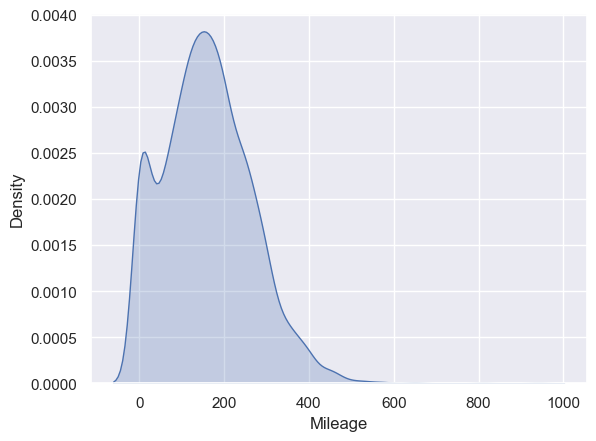

In [130]:
# 2. Mileage
sns.kdeplot(data['Mileage'], fill = True)

<Axes: xlabel='Mileage', ylabel='Density'>

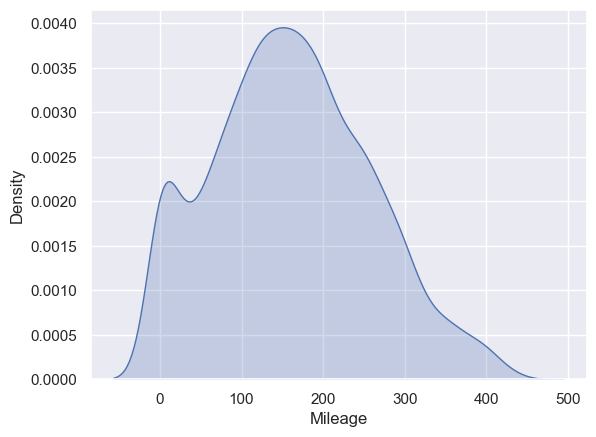

In [131]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
sns.kdeplot(data_2['Mileage'], fill=True, legend=False)

<Axes: xlabel='EngineV', ylabel='Density'>

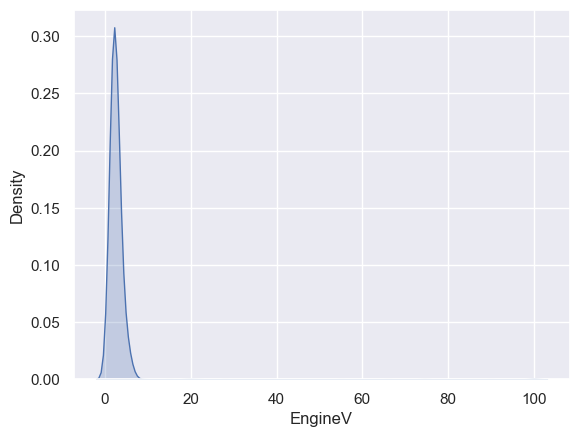

In [132]:
# 3. EngineV
sns.kdeplot(data['EngineV'], fill=True)

<Axes: xlabel='EngineV', ylabel='Density'>

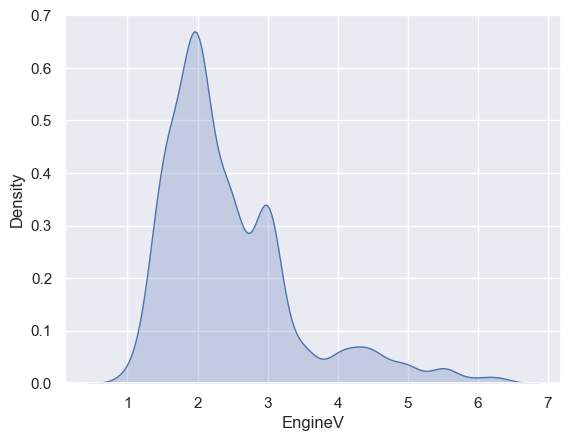

In [133]:
# with search in google, we understand car's EngineV usually uder 6.5 
data_3 = data_2[data_2['EngineV'] < 6.5]
sns.kdeplot(data_3['EngineV'], fill=True)

<Axes: xlabel='Year', ylabel='Density'>

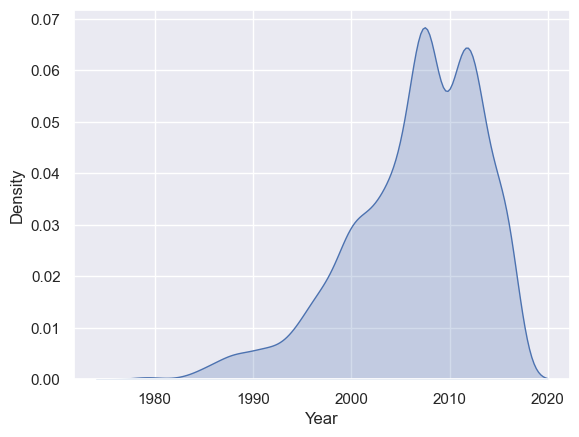

In [134]:
# 4. Year
sns.kdeplot(data['Year'], fill=True)

<Axes: xlabel='Year', ylabel='Density'>

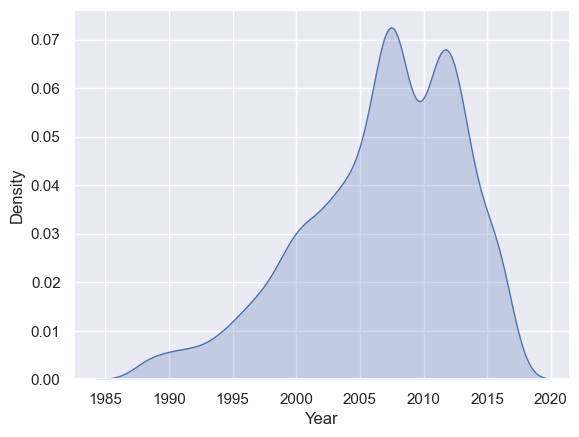

In [135]:
# In 'year' column, cars with a higher year are better.
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]
sns.kdeplot(data_4['Year'], fill=True)

In [136]:
# final data without outlier
data_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
3666,Toyota,23700.0,sedan,100,2.50,Gas,yes,2014,Camry
2281,Renault,5800.0,vagon,200,1.46,Diesel,yes,2008,Grand Scenic
736,Audi,4800.0,sedan,390,2.60,Petrol,yes,1993,100
3416,Audi,1950.0,vagon,300,1.80,Petrol,no,1999,A4
3434,BMW,23500.0,crossover,74,2.00,Petrol,yes,2010,X1
...,...,...,...,...,...,...,...,...,...
3444,Mercedes-Benz,9900.0,sedan,320,2.70,Diesel,yes,2001,E-Class
466,BMW,5300.0,sedan,147,2.20,Gas,no,2001,320
3092,Toyota,21999.0,other,65,2.50,Petrol,yes,2012,Camry
3772,BMW,8900.0,sedan,240,2.00,Diesel,yes,2001,320


In [137]:
data_cleaned_outlier = data_4.reset_index(drop=True)
data_cleaned_outlier

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,Toyota,23700.0,sedan,100,2.50,Gas,yes,2014,Camry
1,Renault,5800.0,vagon,200,1.46,Diesel,yes,2008,Grand Scenic
2,Audi,4800.0,sedan,390,2.60,Petrol,yes,1993,100
3,Audi,1950.0,vagon,300,1.80,Petrol,no,1999,A4
4,BMW,23500.0,crossover,74,2.00,Petrol,yes,2010,X1
...,...,...,...,...,...,...,...,...,...
3087,Mercedes-Benz,9900.0,sedan,320,2.70,Diesel,yes,2001,E-Class
3088,BMW,5300.0,sedan,147,2.20,Gas,no,2001,320
3089,Toyota,21999.0,other,65,2.50,Petrol,yes,2012,Camry
3090,BMW,8900.0,sedan,240,2.00,Diesel,yes,2001,320


In [138]:
data_cleaned_outlier.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3092,3092.000000,3092,3092.000000,3092.000000,3092,3092,3092.000000,3092
unique,7,NaN,6,NaN,NaN,4,2,NaN,273
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,686,NaN,1187,NaN,NaN,1447,2807,NaN,140
mean,NaN,18419.310006,NaN,159.972833,2.447979,NaN,NaN,2006.712484,NaN
std,NaN,19503.889836,NaN,96.330110,0.948066,NaN,NaN,6.160986,NaN
min,NaN,800.000000,NaN,0.000000,1.000000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,156.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21725.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


#### 3.4 Dealing with missing values

In [139]:
# 1. Numerical ===>>> missing values (1.drop_rows, 2.drop_columns, 3.replace)
# 2. Categorical and text data ===>>> LabelEncoder, OneHotEncoder
# 3. Numerical data ===>>> Feature sacling (1.Standardization : calculate variance and good for outlier
#                                           2.Normalization [0, 1] : It dosen't good for outlier and good for neural network)
# 4. Numeriacal ===>>> Custom Transforms (add new feature form other columns or changes data)

In [140]:
data_cleaned_outlier.isnull().sum()
### we don't have missing values.

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

#### 3.5 Feature Scaling

In [141]:
numerical_data = data_cleaned_outlier[['Price','Mileage','EngineV','Year']]
numerical_data

,Price,Mileage,EngineV,Year
0,23700.0,100,2.50,2014
1,5800.0,200,1.46,2008
2,4800.0,390,2.60,1993
3,1950.0,300,1.80,1999
4,23500.0,74,2.00,2010
...,...,...,...,...
3087,9900.0,320,2.70,2001
3088,5300.0,147,2.20,2001
3089,21999.0,65,2.50,2012
3090,8900.0,240,2.00,2001


In [142]:
############################################################ feature scaling ###################################################################
# 1.Standardization : calculate variance and good for outlier
# 2.Normalization [0, 1] : It dosen't good for outlier and good for neural network
################################################################################################################################################

from sklearn.preprocessing import StandardScaler

feature_scale = StandardScaler()
data_num_scaled = pd.DataFrame(feature_scale.fit_transform(numerical_data.values), columns= numerical_data.columns)
data_num_scaled.head()

,Price,Mileage,EngineV,Year
0,0.270794,-0.622677,0.054880,1.183040
1,-0.647120,0.415588,-1.042267,0.209013
2,-0.698400,2.388291,0.160375,-2.226056
3,-0.844548,1.453853,-0.683585,-1.252029
4,0.260538,-0.892626,-0.472595,0.533689


#### 3.6 OneHotEncoder

In [143]:
from sklearn.preprocessing import OneHotEncoder

# Step 1: Create the encoder and fit_transform the data
encoder_1hot = OneHotEncoder(sparse_output=False)
data_cat_1hot_tmp = encoder_1hot.fit_transform(data_cleaned_outlier[['Brand',"Body","Engine Type","Registration"]])

# Step 2: Create a DataFrame with the encoded data and set appropriate column names
data_cat_1hot = pd.DataFrame(data_cat_1hot_tmp)
data_cat_1hot.columns = encoder_1hot.get_feature_names_out()
data_cat_1hot.head()


,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [144]:
data_cat_1hot.shape

(3092, 19)

In [145]:
# numerical attributes: 'Price','Mileage','EngineV','Year'
# categorical attributes: 'Brand',"Body","Engine Type","Registration" ===> 19 columns in OneHotEncoder
# remove 'Model' atributte, because it have lots of unique values. 

final = pd.concat([data_num_scaled, data_cat_1hot], axis=1)
final.head()

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,0.270794,-0.622677,0.054880,1.183040,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.647120,0.415588,-1.042267,0.209013,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.698400,2.388291,0.160375,-2.226056,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.844548,1.453853,-0.683585,-1.252029,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.260538,-0.892626,-0.472595,0.533689,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [146]:
final.shape

(3092, 23)

In [147]:
# final.info()

In [148]:
final_label = final['Price'].copy()                 # model should predict this label
final_noLabel = final.drop('Price', axis = 1)       # we should remove label from train data, because model should predict it.
final_noLabel

,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,-0.622677,0.054880,1.183040,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.415588,-1.042267,0.209013,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.388291,0.160375,-2.226056,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.453853,-0.683585,-1.252029,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.892626,-0.472595,0.533689,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,1.661506,0.265870,-0.927353,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3088,-0.134692,-0.261605,-0.927353,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3089,-0.986070,0.054880,0.858364,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3090,0.830894,-0.472595,-0.927353,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [149]:
final_noLabel.columns

Index(['Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes'],
      dtype='object')

### 3.7 Preprocessing with pipline

In [167]:
# This cell get similar output of above, but it's pipline from.

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.pipeline import FeatureUnion
    
# # # select numerical columns or text columns
# class DataFrameSelector(BaseEstimator, TransformerMixin):           
#     def __init__(self, attribute_names):
#         self.attribute_names = attribute_names
#     def fit (self, x, y = None):
#         return self
#     def transform(self, x):
#         return x[self.attribute_names].values

# # outliers
# class remove_outliers(BaseEstimator, TransformerMixin):
#     def fit (self, x = None):
#         return self

#     def transform (self, x = None):
#         q_price = df1['Price'].quantile(0.99)   # 99% top of data
#         data_1 = df1[df1['Price'] < q_price]

#         q_Mileage = data_1['Mileage'].quantile(0.99)
#         data_2 = data_1[data_1['Mileage'] < q_Mileage]
        
#         data_3 = data_2[data_2['EngineV'] < 6.5]

#         q_Year = data_3['Year'].quantile(0.01)
#         data_4 = data_3[data_3['Year'] > q_Year]

#         data_cleaned_outlier = data_4.reset_index(drop=True)

#         return data_cleaned_outlier
    

# df = train_set.copy()
# df1 = train_set.copy()
# df_label = df['Price'].copy()
# df = df.drop(["Price","Model"], axis=1)

# df_num = df.drop(["Body","Engine Type","Registration",'Brand'], axis=1)                     # Numerical dataframe 
# num_attrs = list(df_num)                                                                    # list of Numerical attributes
# cat_attrs = ['Brand',"Body","Engine Type","Registration"]                                   # Categorical attributes

# # Numerical attributes
# num_pipline = Pipeline([
#     ('selector', DataFrameSelector(num_attrs)),
#     ('std_scaler', StandardScaler()),
#     # ('ouliers', remove_outliers())
# ])

# # Categorical attributes
# cat_attrs = ['Brand',"Body","Engine Type","Registration"] 
# cat_pipline = Pipeline([
#     ('selector', DataFrameSelector(cat_attrs)),
#     ('one_hot_encoder', OneHotEncoder(sparse_output=False))
# ])

# Numerical pipeline and Categorical Pipeline
# Combine Pipeline
# full_pipline = FeatureUnion(transformer_list= [
#     ('num_pipline', num_pipline),
#     ('cat_pipline', cat_pipline),
# ])


# # # This is pipeline, do for new data just run this code and doesn't need run lots of code
# df_prepared = full_pipline.fit_transform(df)

# # # create dataframe
# car_prepared_df = pd.DataFrame(df_prepared, columns= ['Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
#                                                      'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
#                                                      'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
#                                                      'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
#                                                      'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
#                                                      'Engine Type_Petrol', 'Registration_no', 'Registration_yes'])
# car_prepared_df.head()


,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,-0.575511,-0.058216,1.108273,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.381055,-0.262550,0.211263,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.198530,-0.038569,-2.031260,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.337621,-0.195748,-1.134251,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.824218,-0.156453,0.510267,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [151]:
car_prepared_df.shape

(3476, 22)

## Step 4: ML Model

In [168]:
final_noLabel

,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
count,3.092000e+03,3.092000e+03,3.092000e+03,3092.000000,3092.000000,3092.000000,3092.000000,3092.000000,3092.000000,3092.000000,...,3092.000000,3092.000000,3092.000000,3092.000000,3092.000000,3092.000000,3092.000000,3092.000000,3092.000000,3092.000000
mean,9.192015e-18,1.574133e-16,-1.248103e-14,0.101876,0.163001,0.193402,0.079560,0.108991,0.131307,0.221863,...,0.097348,0.383894,0.090233,0.156533,0.467982,0.145213,0.023933,0.362872,0.092173,0.907827
std,1.000162e+00,1.000162e+00,1.000162e+00,0.302534,0.369427,0.395030,0.270655,0.311678,0.337790,0.415567,...,0.296479,0.486411,0.286561,0.363419,0.499054,0.352373,0.152864,0.480906,0.289317,0.289317
min,-1.660942e+00,-1.527544e+00,-3.037746e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.265034e-01,-6.835847e-01,-6.026770e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-4.124853e-02,-2.616049e-01,2.090127e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.751543e-01,5.823546e-01,8.583645e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2.886659e+00,4.063687e+00,1.507716e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 5: Test Model

## Step 6: Visualizing the Result